In [1]:
%matplotlib inline


# Plot RGB Volume Data


This plots an example RGB dataset onto an example subject, S1, onto a flatmap
using quickflat. In order for this to run, you have to a have a flatmap for
this subject in the pycortex filestore.

The cortex.VolumeRGB object is instantiated with three cortex.Volume objects,
one for each of the three color channels. Ideally, the data in the Volume
objects will be scaled to be between 0-255 and be np.uint8 type.

Here, two datasets are generated to look like gradients across the brain and
a third dataset makes a series of stripes across the brain.


Background RRGGBBAA: ffffff00
Area 0:0:1960.5:1024 exported to 1960 x 1024 pixels (96 dpi)


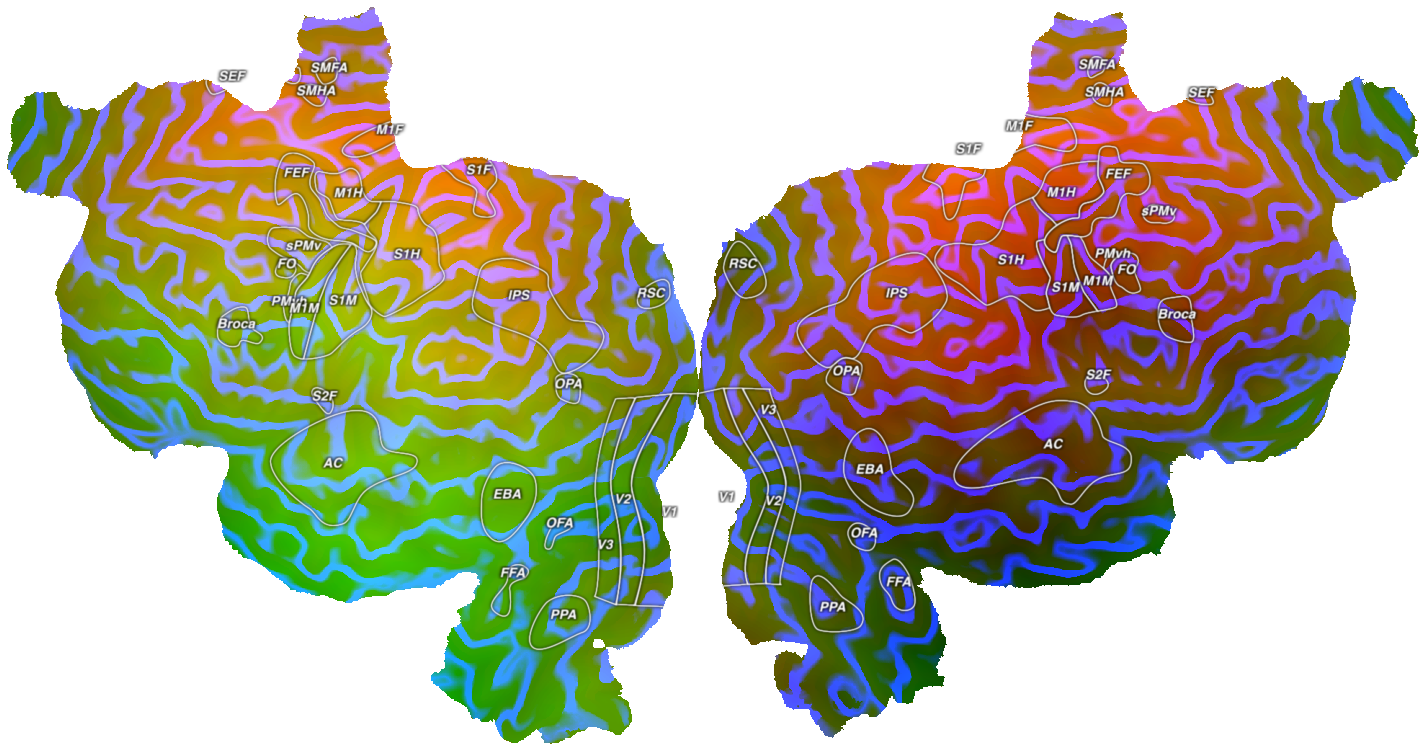

In [2]:
import cortex
import numpy as np
import matplotlib.pyplot as plt

subject = "S1"
xfm = "fullhead"

# Creating three test datasets that are the same shape as this transform with
# one entry for this voxel
# The first two are gradients going in different directions across the brain
# and the third is stripes across certain slices of the brain
test1 = np.arange(31. * 100 * 100).reshape((31, 100, 100), order='C')
test2 = np.arange(31. * 100 * 100).reshape((31, 100, 100), order='F')
test3 = np.zeros((31, 100, 100))
test3[::3, :, :] = 1

# Scaling the three datasets to be between 0-255
test1_scaled = test1 / np.max(test1) * 255
test2_scaled = test2 / np.max(test2) * 255
test3_scaled = test3 / np.max(test3) * 255

# Creating three cortex.Volume objects with the test data as np.uint8
red = cortex.Volume(test1_scaled.astype(np.uint8), 'S1', 'fullhead')
green = cortex.Volume(test2_scaled.astype(np.uint8), 'S1', 'fullhead')
blue = cortex.Volume(test3_scaled.astype(np.uint8), 'S1', 'fullhead')

# This creates an RGB Volume from the three different color channels for
# this subject
# Note that you do not need to specify the transform when creating this as it
# is already specified in the red, green, and blue channels
vol_data = cortex.VolumeRGB(red, green, blue, subject)
cortex.quickshow(vol_data, with_colorbar=False)
plt.show()